Reading list : 

https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94

https://en.wikipedia.org/wiki/Multicollinearity

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://en.wikipedia.org/wiki/Occam%27s_razor

https://en.wikipedia.org/wiki/Minimum_description_length

https://towardsdatascience.com/features-correlations-data-leakage-confounded-features-and-other-things-that-can-make-your-deep-771bcaf84f9f

https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables

https://machinelearningmastery.com/data-leakage-machine-learning/

https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383

https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html


data leakage, à cause de la corrélation entre features, le fait de bouger un peu une feature, va non seulement influencer le resultat mais aussi les features elles memes, donc la prédiction sera plus aléatoire

scaling, normalisation, : à ne faire que sur le train set

transformation : à faire sur train et test set




**1. Avancées de l’étudiant sur son projet depuis la dernière session**

Vincent a bien avancé sur le P3; il a effectué le nettoyage de données il est sur la fin.

- Test de plusieurs modèles et benchmark

**2. Principaux sujets abordés pendant la session, obstacles à surmonter (le cas échéant), et actions nécessaires pour atteindre ces objectifs**

Balayage des modèles effectués

- Random Forrest est le meilleur
- XgBoost
- Dummy
- LinearRegression

Correlations à isoler pour éviter le leakage

Passage au log et checker l'impact

StandardScaler - MinMax

**3. Objectifs 'SMART' fixés par l'étudiant et le mentor pour la prochaine session**

- Plusieurs scores RMSE - MSE - R2
- Graphiques sur les resultats des differents modèles
- Avoir une approche iterative sur le travail sur les données
- Ajouter le temps de calcul comme choix de decision
- Analyser les résultats par topologie de bâtiments
    - Surface
    - Etages
    - Type de bâtiments
- Passage au log
- Ajouter les variables catégorielles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('./tmp/df_cleaned.gzip')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 6 to 6715
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            5600 non-null   object 
 1   PrimaryPropertyType     5600 non-null   object 
 2   Neighborhood            5600 non-null   object 
 3   NumberofFloors          5370 non-null   float64
 4   PropertyGFATotal        5258 non-null   float64
 5   LargestPropertyUseType  5482 non-null   object 
 6   ENERGYSTARScore         4292 non-null   float64
 7   SourceEUI(kBtu/sf)      5281 non-null   float64
 8   SiteEnergyUse(kBtu)     5400 non-null   float64
 9   TotalGHGEmissions       5600 non-null   float64
 10  GHGEmissionsIntensity   5335 non-null   float64
 11  BuildingAge             5600 non-null   int64  
 12  Distance                5600 non-null   float64
 13  NaturalGasRate          5160 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

In [28]:
df.shape

(5600, 14)

very important article why to normalize features:
https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94


In [26]:
df.var().round(2)

NumberofFloors           3.120000e+00
PropertyGFATotal         1.139189e+09
ENERGYSTARScore          6.894200e+02
SourceEUI(kBtu/sf)       1.969790e+03
SiteEnergyUse(kBtu)      3.160301e+12
TotalGHGEmissions        2.304300e+03
GHGEmissionsIntensity    4.700000e-01
BuildingAge              1.106860e+03
Distance                 4.920000e+00
NaturalGasRate           7.000000e-02
dtype: float64

In [25]:
df.skew().round(2)

NumberofFloors           0.45
PropertyGFATotal         1.61
ENERGYSTARScore         -0.90
SourceEUI(kBtu/sf)       0.97
SiteEnergyUse(kBtu)      1.60
TotalGHGEmissions        1.47
GHGEmissionsIntensity    1.47
BuildingAge              0.52
Distance                 0.80
NaturalGasRate           0.75
dtype: float64

certaines features ne suivent pas des distributions normales, mais on peut les transformer pour y parvenir: 

TODO : remove negative values (PropertyGFABuilding, for inst.)

IndexError: index 2 is out of bounds for axis 1 with size 2

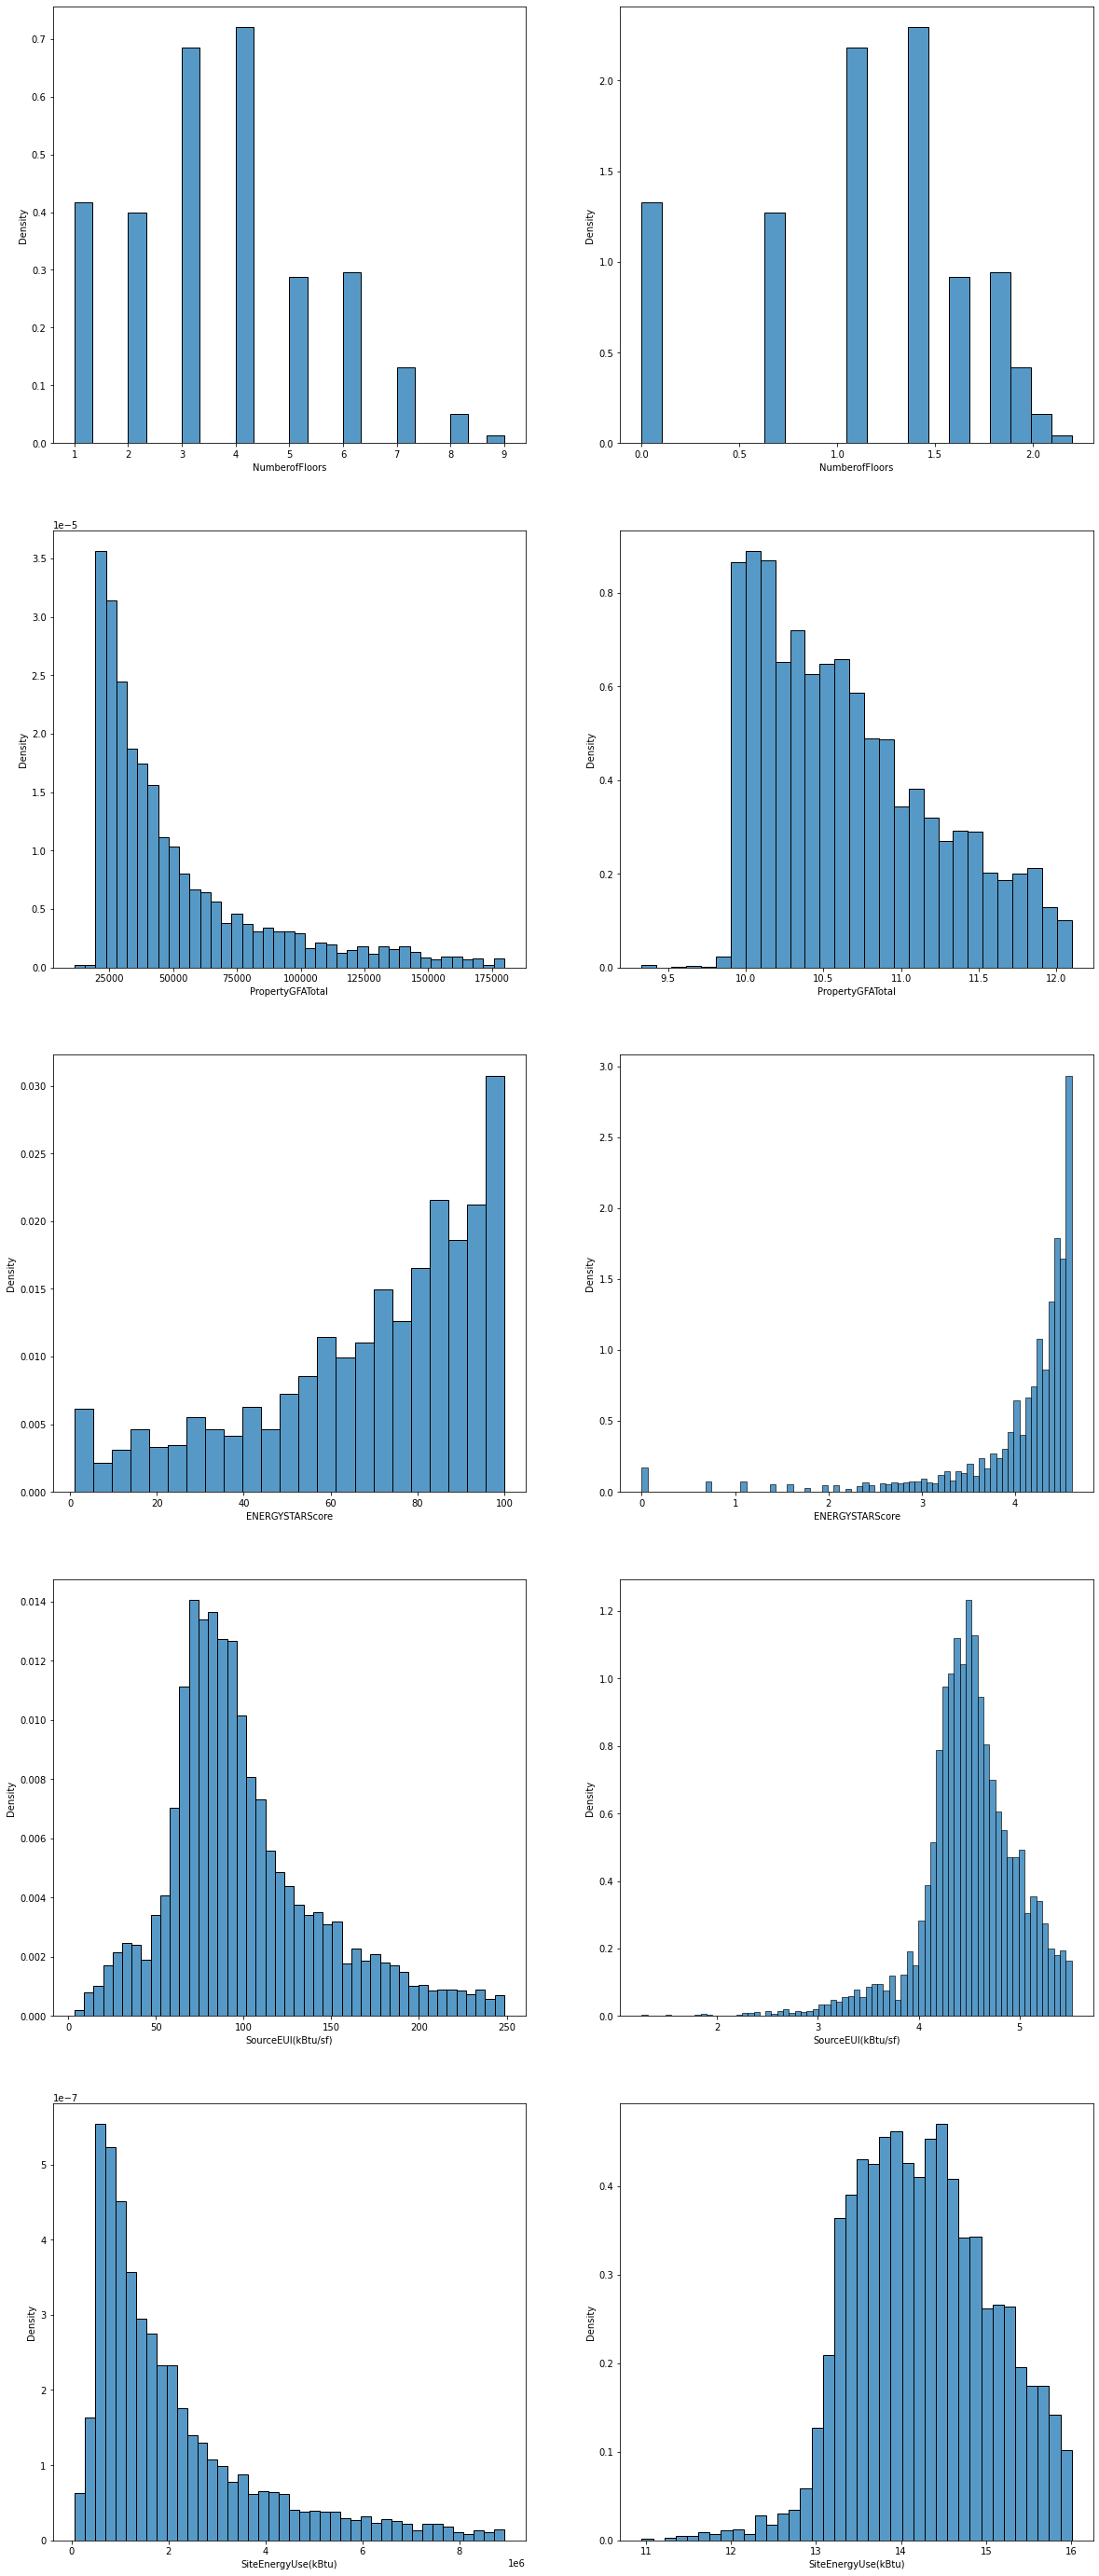

In [24]:
from sklearn.preprocessing import FunctionTransformer
# on regarde le resultat du passage au log pour certaines features, si cela permet d'avoir une distribution normale
# TODO WIP

to_log_features = df.select_dtypes(['float', 'int']).columns
size = to_log_features.shape[0]

nrows = int(size/2)
ncols = int(size/4)
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(20,50))

for i, col in enumerate(to_log_features):
	logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
	y_log = logtransformer.transform(df[col])

	# print(f'ploting first on ({i%nrows},{ i//nrows * 2}), second on ({i%nrows},{1 + i//nrows * 2})')
	
	sns.histplot(data=df[col], stat="density", ax=ax[i%nrows, i//nrows * 2])#.set_title(col)
	# ax[0].set_title("Without log")
	
	sns.histplot(data=y_log, stat="density", ax=ax[i%nrows, 1 + i//nrows * 2])#.set_title(f'{col}-log')
	# ax[1].set_title("With log")

plt.show()

In [31]:
agg_func = ['std', 'skew', 'var']
def stats_desc(df):
    print(df.agg(agg_func))

stats_desc(df.select_dtypes(['float', 'int']))

      NumberofFloors  PropertyGFATotal  ENERGYSTARScore  SourceEUI(kBtu/sf)  \
std         1.767021      3.375187e+04        26.256801           44.382345   
skew        0.445056      1.613754e+00        -0.900268            0.968131   
var         3.122362      1.139189e+09       689.419578         1969.792528   

      SiteEnergyUse(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
std          1.777724e+06          48.003131               0.682128   
skew         1.598250e+00           1.468106               1.468306   
var          3.160301e+12        2304.300596               0.465299   

      BuildingAge  Distance  NaturalGasRate  
std     33.269570  2.219051        0.268383  
skew     0.523466  0.803548        0.754646  
var   1106.864296  4.924188        0.072029  


In [66]:

from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector as selector
from datetime import datetime



prediction = 'TotalGHGEmissions'

X = df.drop([prediction], axis=1)
y = df[prediction]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# numerical_features = df.select_dtypes(include=['int64','float64']).columns.drop(prediction)
# categorical_features = df.select_dtypes(include=['object']).columns
# print('numerical features:', numerical_features.values)
# print('categorical features: ', categorical_features.values)


def runModel(model, params={}):
	start_time = datetime.now()
	# categorical features : they are only nominal (not cardinal),
	# thus we could encode them with OneHotEncoder (not OrdinalEncoder)
	categorical_transformer = OneHotEncoder(handle_unknown="ignore")

	numeric_transformer = Pipeline(
		steps=[
			("imputer", SimpleImputer()), 
			# ("imputer", SimpleImputer(strategy="median")), 
			("scaler", StandardScaler())
			]
	)

	preprocessor = ColumnTransformer(
		transformers=[
			("num", numeric_transformer, selector(dtype_exclude="object")),
			("cat", categorical_transformer, selector(dtype_include="object"))
		]
	)

	reg = Pipeline(
		steps=[("preprocessor", preprocessor), ("classifier", model)]
	)

	reg.fit(X_train, y_train)

	params["preprocessor__num__imputer__strategy"] = ["mean", "median"]	

	gs = GridSearchCV(
		estimator=reg, 
		cv=5, 
		param_grid=params)
		
	gs.fit(X_train, y_train)
	end_time = datetime.now()
	
	ellapsed_time = end_time - start_time
	y_pred = gs.predict(X_test)
	
	ret = {
		'model' : type(model).__name__,
		'compute_time' : ellapsed_time,
		'best_params' : gs.best_params_,
		'RMSE' : np.sqrt(mean_squared_error(y_pred, y_test)),
		'MAE' : mean_absolute_error(y_pred, y_test),
		'R2' : r2_score(y_pred, y_test)
	}

	# TODO print validation curve : https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

	return ret	





In [67]:

# Dummy regressor as a baseline / test
runModel(DummyRegressor(strategy="mean"))



{'model': 'DummyRegressor',
 'compute_time': datetime.timedelta(microseconds=203812),
 'best_params': {'preprocessor__num__imputer__strategy': 'mean'},
 'RMSE': 46.015526280841634,
 'MAE': 35.976654284917096,
 'R2': -1.0484998868744623e+31}

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import xgboost as xgb
from xgboost import XGBRegressor
import os
from dataclasses import dataclass

xgb.set_config(verbosity=0)

@dataclass
class ModelCompute:
    model: object
    params: dict


parameters_svr = {
	'classifier__C' : np.logspace(-2, -1, 10),
	'classifier__loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

parameters_rf = {
			'classifier__n_estimators' : [10,50,100,300,500],
			'classifier__min_samples_leaf' : [1,3,5,10], 
			'classifier__max_features': ['auto', 'sqrt']
		}

parameters_knn = {
	'classifier__n_neighbors' : [2, 4, 8, 10, 16]
}

parameters_xgb = {
	'classifier__n_estimators' : [200, 500, 1000],
	'classifier__max_depth' : [2, 5, 10],
	'classifier__eval_metric' : ["rmse"],

}

parameters_ridge = {
	'classifier__alpha' : np.logspace(-5, 5, 200)
}

parameters_lasso = {
	'classifier__alpha' : np.logspace(-5, 1, 300)
}

parameters_net = {
	'alpha' : np.logspace(-5, 1, 300),
	# 'l1_ratio' : np.logspace(-5, 1, 300)
}

models = [
	ModelCompute(DummyRegressor(strategy="mean"), {}),
	ModelCompute(LinearRegression(), {}),
	ModelCompute(KNeighborsRegressor(), parameters_knn),
	# ModelCompute(RandomForestRegressor(n_jobs=os.cpu_count()), parameters_rf),
	# ModelCompute(XGBRegressor(n_jobs=os.cpu_count()), parameters_xgb),
	ModelCompute(LinearSVR(), parameters_svr),
	# ModelCompute(Ridge(), parameters_ridge),
	# ModelCompute(Lasso(), parameters_lasso),
	# ModelCompute(ElasticNet(), parameters_net)
]

results = pd.DataFrame(
	columns=['model', 'compute_time','best_params','RMSE','MAE','R2']
	)

print(f'computing models with maximum of {os.cpu_count()} cpus')

for mod in models:
	ret = runModel(mod.model, mod.params)
	results = results.append(ret, ignore_index=True)
	
	# print(f'results for model {ret["model"]}')
	# print(f'   computation time: {ret["compute_time"]}')
	# print(f'   best params: {ret["best_params"]}')
	# print(f'   RMSE : {ret["RMSE"]}')
	# print(f'   MAE : {ret["MAE"]}')
	# print(f'   R2 : {ret["R2"]}')

results.T

computing models with maximum of 32 cpus


,0,1,2,3
model,DummyRegressor,LinearRegression,KNeighborsRegressor,LinearSVR
compute_time,0 days 00:00:00.179971,0 days 00:00:00.648831,0 days 00:00:06.374765,0 days 00:00:03.519417
best_params,{'preprocessor__num__imputer__strategy': 'mean'},{'preprocessor__num__imputer__strategy': 'mean'},"{'classifier__n_neighbors': 4, 'preprocessor__...","{'classifier__C': 0.027825594022071243, 'class..."
RMSE,46.015526,26.036708,21.227446,26.186446
MAE,35.976654,15.988526,11.192103,15.939215
R2,-10484998868744622955027025100800.0,0.538003,0.732297,0.519233


In [75]:
for b in results.best_params:
	print(b)

{'preprocessor__num__imputer__strategy': 'mean'}
{'preprocessor__num__imputer__strategy': 'mean'}
{'classifier__n_neighbors': 4, 'preprocessor__num__imputer__strategy': 'mean'}
{'classifier__C': 0.027825594022071243, 'classifier__loss': 'squared_epsilon_insensitive', 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:

# from sklearn.dummy import DummyRegressor
# from sklearn import preprocessing
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
# from datetime import datetime


# # we use a scaler
# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)


# # def printModelScores(y_pred, y_test):
# # 	print(f'RMSE : {np.sqrt(mean_squared_error(y_pred, y_test))}')
# # 	print(f'MAE : {mean_absolute_error(y_pred, y_test)}')
# # 	print(f'R2 : {r2_score(y_pred, y_test)}')

# def runModel(model, params={}):
# 	start_time = datetime.now()
# 	pipe = make_pipeline(
# 		StandardScaler(),
		
# 		GridSearchCV(
# 			estimator=model, 
# 			cv=5, 
# 			param_grid=params)
# 	)
# 	pipe.fit(X_train_std, y_train)


# 	gs = GridSearchCV(
# 		estimator=model, 
# 		cv=5, 
# 		param_grid=params)
# 	gs.fit(X_train_std, y_train)
# 	end_time = datetime.now()
	
# 	ellapsed_time = end_time - start_time
# 	y_pred = gs.predict(X_test_std)
	
# 	ret = {
# 		'model' : type(model).__name__,
# 		'compute_time' : ellapsed_time,
# 		'best_params' : gs.best_params_,
# 		'RMSE' : np.sqrt(mean_squared_error(y_pred, y_test)),
# 		'MAE' : mean_absolute_error(y_pred, y_test),
# 		'R2' : r2_score(y_pred, y_test)
# 	}

# 	print(f'result for model {ret["model"]}')
# 	print(f'   computation time: {ret["compute_time"]}')
# 	print(f'   best params: {ret["best_params"]}')
# 	print(f'   RMSE : {ret["RMSE"]}')
# 	print(f'   MAE : {ret["MAE"]}')
# 	print(f'   R2 : {ret["R2"]}')

# 	# TODO print validation curve : https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py

# 	return ret	





In [19]:
np.var(X_train)

NumberofFloors           3.090380e+00
PropertyGFATotal         1.167739e+09
ENERGYSTARScore          6.895831e+02
SourceEUI(kBtu/sf)       1.979859e+03
SiteEnergyUse(kBtu)      3.238538e+12
GHGEmissionsIntensity    4.696760e-01
BuildingAge              1.111329e+03
Distance                 4.917338e+00
NaturalGasRate           7.180288e-02
dtype: float64

<AxesSubplot:>

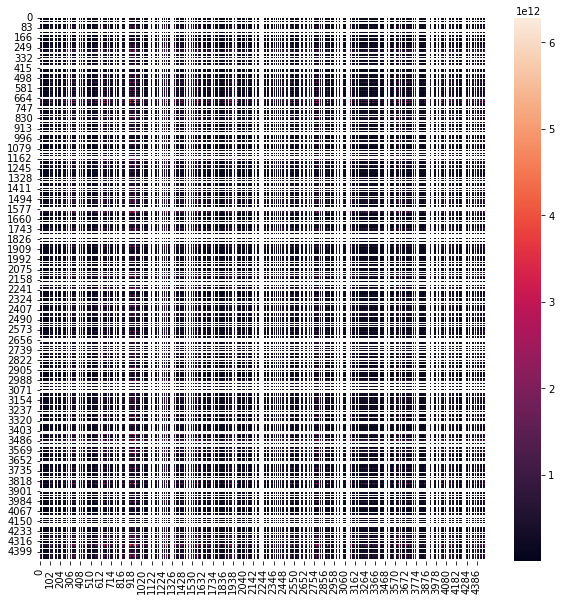

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(np.cov(X_train[numerical_features]))

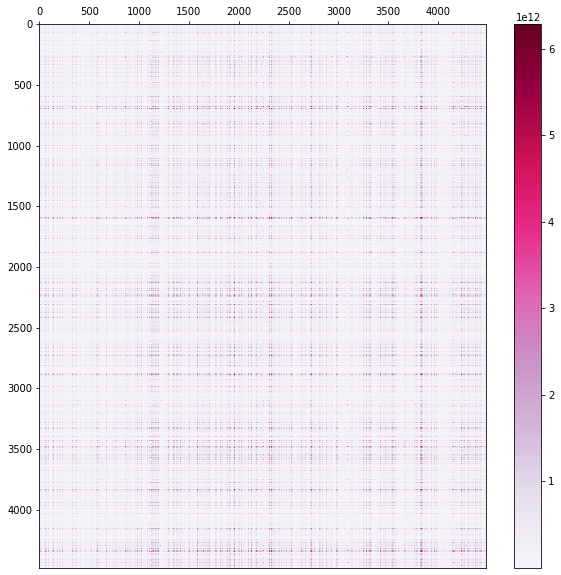

In [21]:
import matplotlib
plt.figure(figsize=(10,10))
plt.pcolor(np.cov(X_train[numerical_features]), cmap=matplotlib.cm.PuRd)
plt.colorbar()
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

In [ ]:
# Sample

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components=2),SVC(random_state=1))
# param_range = [0.001,0.01,0.1,1,10,100,1000]
param_grid = {'svc__C': [0.001,0.01,0.1,1,10,100,1000], 'svc__kernel': ['linear', 'rbf'],
              'svc__gamma': [0.001,0.01,0.1,1,10,100,1000]}
cv = StratifiedKFold(n_splits=5)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid, scoring='accuracy', cv = cv,
                  return_train_score=True)
gs.fit(X_train, y_train)

print("Best Estimator: \n{}\n".format(gs.best_estimator_))
print("Best Parameters: \n{}\n".format(gs.best_params_))
print("Best Test Score: \n{}\n".format(gs.best_score_))
print("Best Training Score: \n{}\n".format(gs.cv_results_['mean_train_score'][gs.best_index_]))
print("All Training Scores: \n{}\n".format(gs.cv_results_['mean_train_score']))
print("All Test Scores: \n{}\n".format(gs.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
print("All Meta Results During CV Search: \n{}\n".format(gs.cv_results_))
